In [1]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
import os
import numpy as np
import matplotlib.pyplot as plt

In [13]:
path = r"D:\Sam-Johnston\Deforestation_Monitoring\area2"
VV_im = Image.open(os.path.join(path, "VV.tiff"))
VH_im = Image.open(os.path.join(path, "VH.tiff"))

In [54]:
VV = np.array(VV_im)
VH = np.array(VH_im)

In [55]:
print(VV.shape)

(16742, 25725)


In [56]:
eps = 10E-14
VV_VH = np.divide(VV, VH+eps)

In [57]:
VV = (VV - VV.min()) / (VV.max() - VV.min())
VH = (VH - VH.min()) / (VH.max() - VH.min())
VV_VH = (VV_VH - VV_VH.min()) / (VV_VH.max() - VV_VH.min())

In [58]:
rgb = np.stack([VV, VH, VV_VH], axis=2)

# MinMaxScale
# rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min())

MemoryError: Unable to allocate 9.63 GiB for an array with shape (16742, 25725, 3) and data type float64

In [ ]:
plt.imshow(rgb[500:4500, 500:4500]);

In [12]:
from sklearn.cluster import KMeans

In [61]:
X = rgb[:,:,].reshape(-1, 3)
kmeans = KMeans(n_clusters=6, random_state=14).fit(X)

In [62]:
Y = kmeans.labels_

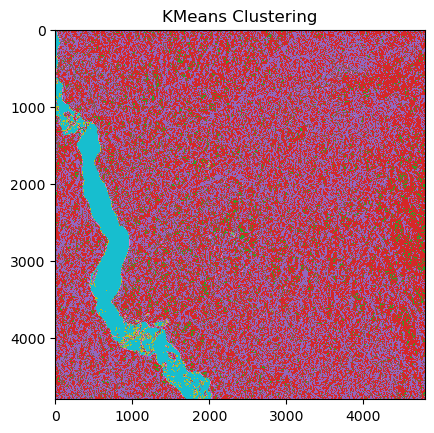

In [66]:
plt.imshow(Y.reshape(4800, 4800, 1), cmap='tab10');
plt.title("KMeans Clustering");

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler